In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Processing data with Pandas

In [40]:
df = pd.read_csv('air_temp.csv')
df.head(5)

,Year,m,d,Time,Time zone,Air temperature (degC)
0,2021,6,1,00:00,UTC,6.2
1,2021,6,1,01:00,UTC,6.4
2,2021,6,1,02:00,UTC,6.4
3,2021,6,1,03:00,UTC,6.8
4,2021,6,1,04:00,UTC,7.1


In [41]:
# for datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2209 non-null   int64  
 1   m                       2209 non-null   int64  
 2   d                       2209 non-null   int64  
 3   Time                    2209 non-null   object 
 4   Time zone               2209 non-null   object 
 5   Air temperature (degC)  2204 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 103.7+ KB


In [42]:
# for statistics of all the columns such as mean, median, std, etc
df.describe()

,Year,m,d,Air temperature (degC)
count,2209.0,2209.000000,2209.000000,2204.000000
mean,2021.0,7.011770,15.830240,12.049365
std,0.0,0.815301,8.859852,5.021324
min,2021.0,6.000000,1.000000,0.500000
25%,2021.0,6.000000,8.000000,8.600000
50%,2021.0,7.000000,16.000000,11.150000
75%,2021.0,8.000000,23.000000,14.700000
max,2021.0,9.000000,31.000000,32.200000


In [43]:
# change column names
df.columns=['year','month', 'day', 'time', 'time_zone','temperature']

# drop rows which contain null values, rows are considered as axis 0
df = df.dropna(axis=0)

# concatenate the 3 columns "year", "month", "day" into a new column "date" in format e.g. 2022-01-26
data = df.assign(date = df["year"].astype(str)+'-'+df["month"].astype(str)+'-'+df["day"].astype(str))

# remove columns "year", "month", "day", "time_zone" that are not used
data = data.drop(['year','month','day','time_zone'],axis=1)

# switch column order
data = data[['date','time','temperature']]

data.tail(5)

,date,time,temperature
2204,2021-8-31,20:00,6.1
2205,2021-8-31,21:00,6.4
2206,2021-8-31,22:00,6.2
2207,2021-8-31,23:00,5.6
2208,2021-9-1,00:00,5.5


In [44]:
# select only single column "temperature" of the DataFrame "data"
tmp = data['temperature']
print(type(tmp),'\n')
print(tmp)

<class 'pandas.core.series.Series'> 

0       6.2
1       6.4
2       6.4
3       6.8
4       7.1
       ... 
2204    6.1
2205    6.4
2206    6.2
2207    5.6
2208    5.5
Name: temperature, Length: 2204, dtype: float64


In [45]:
# extract the values stored in a specific column into a ndarray
data['temperature'].to_numpy()

array([6.2, 6.4, 6.4, ..., 6.2, 5.6, 5.5])

In [46]:
# select the first weather recording (row)
firstrow = data.iloc[0]

print("The first row: \n",firstrow)

# select the row with row label name `3`
rowName3 = data.loc[3]
print("\n The row with row label name '3': \n",rowName3)

The first row: 
 date           2021-6-1
time              00:00
temperature         6.2
Name: 0, dtype: object

 The row with row label name '3': 
 date           2021-6-1
time              03:00
temperature         6.8
Name: 3, dtype: object


In [47]:
# create a "newdataset" which consists only of weather recordings in "data" at "time" `03:00`
newdataset= data[data['time'] == '03:00']
newdataset.sample(5)

,date,time,temperature
1227,2021-7-22,03:00,7.3
1251,2021-7-23,03:00,6.6
1467,2021-8-1,03:00,9.4
531,2021-6-23,03:00,8.4
1707,2021-8-11,03:00,13.9


In [48]:
dates = data['date'].unique()

features = []
labels = []

m = 0

# iterate through the list of dates for which we have weather recordings
for date in dates:
    datapoint = data[(data['date']==date)]
    row_f = datapoint[(datapoint.time=='01:00')]    # select weather recording at time "01:00"
    row_l = datapoint[(datapoint.time=='12:00')]    # select weather recording at time "12:00"
    if len(row_f)==1 and len(row_l)==1:
        feature = row_f['temperature'].to_numpy()[0]  # extract the temperature at "01:00" as feature
        label = row_l['temperature'].to_numpy()[0]    # extract the temperature at "12:00" as label
        features.append(feature)
        labels.append(label)
        m = m+1

X = np.array(features).reshape(m,1)
y = np.array(labels)

print("number of datapoints:",m)
print("the shape of the feature matrix is: ",X.shape)
print('the shape of the label vector is: ',y.shape)

number of datapoints: 92
the shape of the feature matrix is:  (92, 1)
the shape of the label vector is:  (92,)


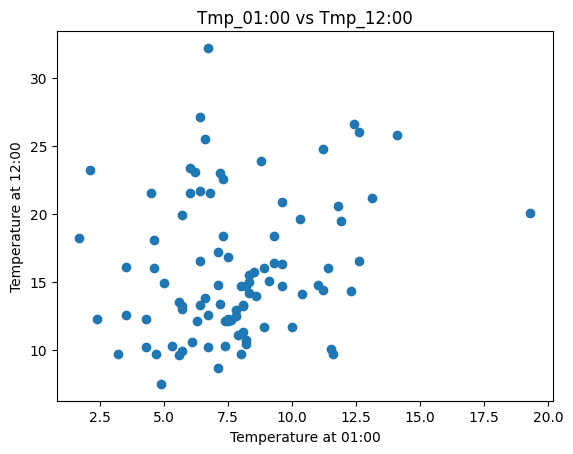

In [49]:
# visualize the datapoints
fig = plt.figure()  #create a figure

ax = fig.add_subplot(1, 1, 1) #add an axes object to the figure

ax.scatter(X,y) #plot a scatterplot in the axes to visualize the datapoints
ax.set_xlabel('Temperature at 01:00') # set the label of x axis
ax.set_ylabel('Temperature at 12:00') #
ax.set_title('Tmp_01:00 vs Tmp_12:00')

plt.show()

In [50]:
regr = LinearRegression()
regr.fit(X,y)

y_pred = regr.predict(X)
tr_error = mean_squared_error(y, y_pred)


print('The training error is: ', tr_error)
print("w1 = ", regr.coef_)
print("w0 = ",regr.intercept_)

The training error is:  24.65782041571265
w1 =  [0.388509]
w0 =  12.831641324091457


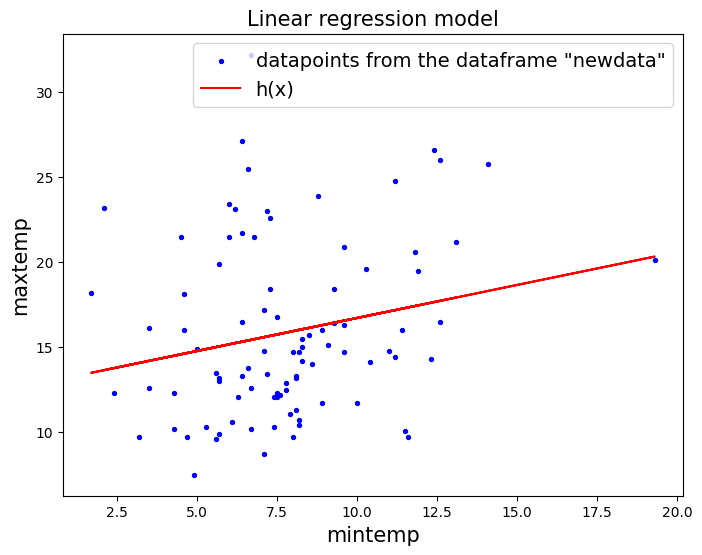

In [51]:
plt.figure(figsize=(8, 6))    # create a new figure with size 8*6

# create a scatter plot of datapoints, dot in color 'blue' and size '8'
plt.scatter(X, y, color='b', s=8, label='datapoints from the dataframe "newdata"')

# plot the predictions obtained by the learnt linear hypothesis using color 'red' and label the curve as "h(x)"
y_pred = regr.predict(X)
plt.plot(X, y_pred, color='r', label='h(x)')

plt.xlabel('mintemp',size=15)
plt.ylabel('maxtemp',size=15)

plt.title('Linear regression model',size=15) # title
plt.legend(loc='best',fontsize=14) # legend

plt.show()

**We can see that a linear regression model does not fit the data therefore we need to look for other models that will work on our dataset. Lets try the model with another dataset**


In [52]:
FMIRawData = pd.read_csv('FMIData.csv')
FMIRawData.head(5)

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Ground minimum temperature (degC),Maximum temperature (degC),Minimum temperature (degC)
0,2020,1,1,00:00,UTC,0.0,-1.0,1.5,NaN,3.4,-2.6
1,2020,1,1,06:00,UTC,NaN,NaN,NaN,-5.7,NaN,NaN
2,2020,1,2,00:00,UTC,-1.0,-1.0,3.6,NaN,5.1,1.8
3,2020,1,2,06:00,UTC,NaN,NaN,NaN,0.1,NaN,NaN
4,2020,1,3,00:00,UTC,1.2,-1.0,4.6,NaN,5.7,4.3


(92, 1)
Polynomial degree =  3
The first two rows of X_poly: 
 [[  1.      6.4    40.96  262.144]
 [  1.      6.6    43.56  287.496]]

The learned weights: 
 [ 2.05764437e+01 -2.29338339e+00  2.64245669e-01 -7.39138817e-03]


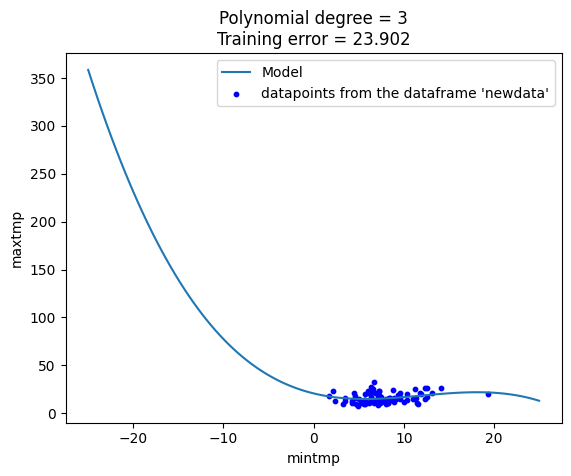

Polynomial degree =  5
The first two rows of X_poly: 
 [[1.00000000e+00 6.40000000e+00 4.09600000e+01 2.62144000e+02
  1.67772160e+03 1.07374182e+04]
 [1.00000000e+00 6.60000000e+00 4.35600000e+01 2.87496000e+02
  1.89747360e+03 1.25233258e+04]]

The learned weights: 
 [ 4.59725515e+01 -2.58424075e+01  7.52205349e+00 -9.79704279e-01
  5.78555167e-02 -1.23731026e-03]


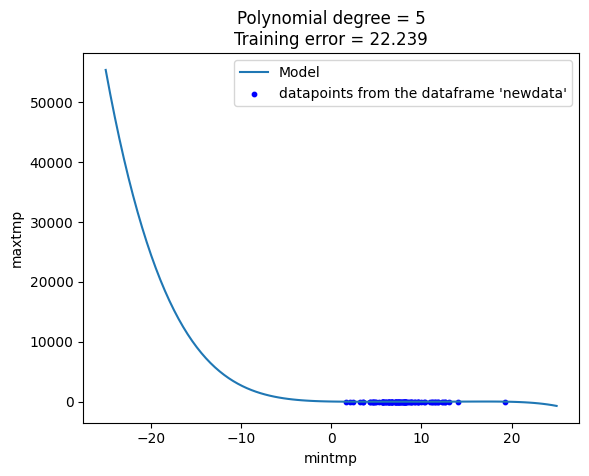

Polynomial degree =  10
The first two rows of X_poly: 
 [[1.00000000e+00 6.40000000e+00 4.09600000e+01 2.62144000e+02
  1.67772160e+03 1.07374182e+04 6.87194767e+04 4.39804651e+05
  2.81474977e+06 1.80143985e+07 1.15292150e+08]
 [1.00000000e+00 6.60000000e+00 4.35600000e+01 2.87496000e+02
  1.89747360e+03 1.25233258e+04 8.26539500e+04 5.45516070e+05
  3.60040606e+06 2.37626800e+07 1.56833688e+08]]

The learned weights: 
 [ 3.07462449e+02 -6.11844442e+02  5.46807905e+02 -2.68879355e+02
  8.00054820e+01 -1.50983943e+01  1.84259476e+00 -1.44634993e-01
  7.03394157e-03 -1.92396911e-04  2.25686870e-06]


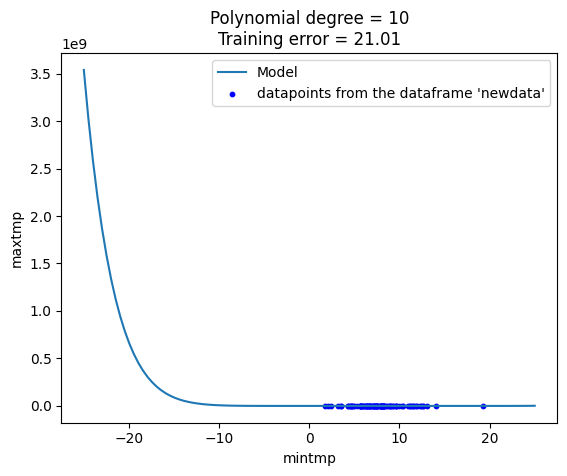

In [53]:
## define a list of values for polynomial degrees
degrees = [3, 5,10]

# declare a variable to store the resulting training errors for each polynomial degree
tr_errors = []
print(X.shape)
for i in range(len(degrees)):

    print("Polynomial degree = ",degrees[i])

    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(X)

    lin_regr = LinearRegression(fit_intercept=False)
    lin_regr.fit(X_poly,y)

    y_pred = lin_regr.predict(X_poly)
    tr_error = mean_squared_error(y, y_pred)

    print("The first two rows of X_poly: \n",X_poly[0:2])

    print("\nThe learned weights: \n",lin_regr.coef_)

    tr_errors.append(tr_error)
    X_fit = np.linspace(-25, 25, 100)
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")

    # plot a scatter plot of y(maxtmp) vs. X(mintmp) with color 'blue' and size '10'
    plt.scatter(X, y, color="b", s=10, label="datapoints from the dataframe 'newdata'")
    plt.xlabel('mintmp')
    plt.ylabel('maxtmp')
    plt.legend(loc="best")
    plt.title('Polynomial degree = {}\nTraining error = {:.5}'.format(degrees[i], tr_error))    # title
    plt.show()

In [54]:
data = FMIRawData.drop(['Time zone', 'Precipitation amount (mm)','Snow depth (cm)'],axis=1)

# change column names
data.columns=['Year','Month', 'Day', 'Time', 'AirTemp','GroundMinTmp','MaxTemp','MinTemp']

# concatenate the 3 columns "Year", "Month", "Day" into a new column "Date" in format e.g. 2022-01-26
date_column = data["Year"].astype(str)+'-'+data["Month"].astype(str)+'-'+data["Day"].astype(str)
data.insert(0,"Date",date_column)

# set inplace=True to do the operation inplace instead of retrun a new dataframe
data.drop(['Year','Month','Day'],axis=1,inplace=True)

data.head()

,Date,Time,AirTemp,GroundMinTmp,MaxTemp,MinTemp
0,2020-1-1,00:00,1.5,NaN,3.4,-2.6
1,2020-1-1,06:00,NaN,-5.7,NaN,NaN
2,2020-1-2,00:00,3.6,NaN,5.1,1.8
3,2020-1-2,06:00,NaN,0.1,NaN,NaN
4,2020-1-3,00:00,4.6,NaN,5.7,4.3


In [55]:
newdata = data[data['Time'] == '00:00'] ;

print("First five rows of the dataframe 'newdata'\n",newdata.head())

First five rows of the dataframe 'newdata'
        Date   Time  AirTemp  GroundMinTmp  MaxTemp  MinTemp
0  2020-1-1  00:00      1.5           NaN      3.4     -2.6
2  2020-1-2  00:00      3.6           NaN      5.1      1.8
4  2020-1-3  00:00      4.6           NaN      5.7      4.3
6  2020-1-4  00:00      1.7           NaN      4.7      0.7
8  2020-1-5  00:00     -1.6           NaN      1.9     -4.9


In [56]:
X = newdata['MinTemp'].to_numpy().reshape(-1, 1)
y = newdata['MaxTemp'].to_numpy()

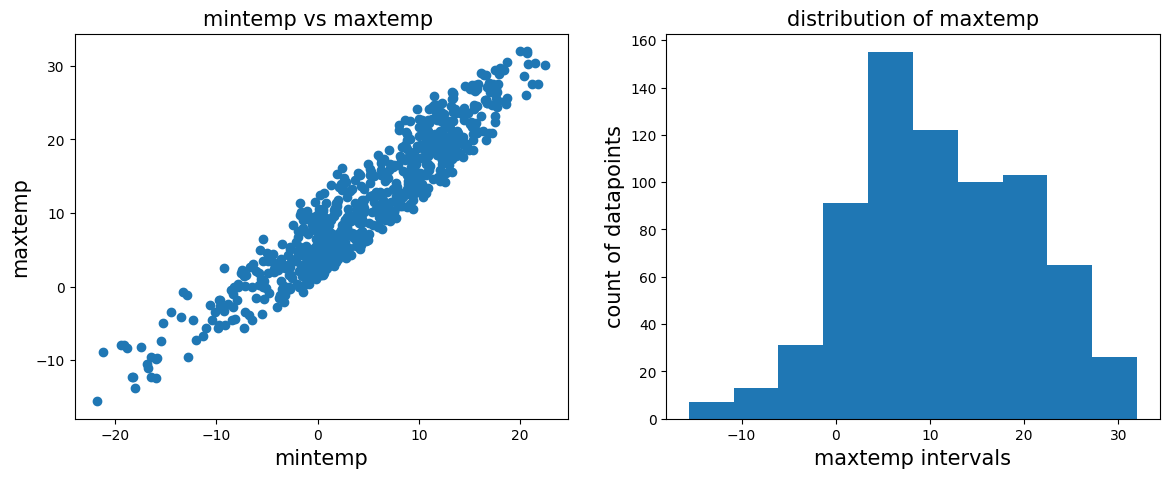

In [57]:
# create a figure with two axes (1 row,2 columns) on it
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# plot a scatter plot on axes[0] to show the relation between MinTemp and MaxTemp
axes[0].scatter(data['MinTemp'],data['MaxTemp'])
axes[0].set_xlabel("mintemp",size=15)
axes[0].set_ylabel("maxtemp",size=15)
axes[0].set_title("mintemp vs maxtemp ",size=15)

# plot a hist plot to show the distribution of MaxTemp
axes[1].hist(data['MaxTemp'])
axes[1].set_title('distribution of maxtemp',size=15)
axes[1].set_ylabel("count of datapoints",size=15)
axes[1].set_xlabel("maxtemp intervals",size=15)
plt.show()

In [58]:
regr = LinearRegression()
regr.fit(X,y)

y_pred = regr.predict(X)
tr_error = mean_squared_error(y, y_pred)


print('The training error is: ', tr_error)
print("w1 = ", regr.coef_)
print("w0 = ",regr.intercept_)

The training error is:  9.969818232805473
w1 =  [1.06990194]
w0 =  6.207368376556122


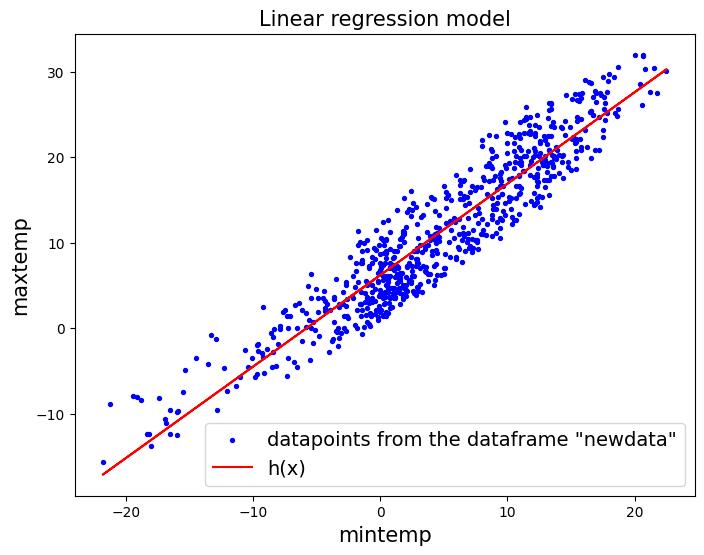

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='b', s=8, label='datapoints from the dataframe "newdata"')
y_pred = regr.predict(X)
plt.plot(X, y_pred, color='r', label='h(x)')
plt.xlabel('mintemp',size=15)
plt.ylabel('maxtemp',size=15)
plt.title('Linear regression model',size=15)
plt.legend(loc='best',fontsize=14)
plt.show()

(713, 1)
Polynomial degree =  3
The first two rows of X_poly: 
 [[  1.     -2.6     6.76  -17.576]
 [  1.      1.8     3.24    5.832]]

The learned weights: 
 [ 5.66167983e+00  1.04645213e+00  8.75902040e-03 -1.27473569e-04]


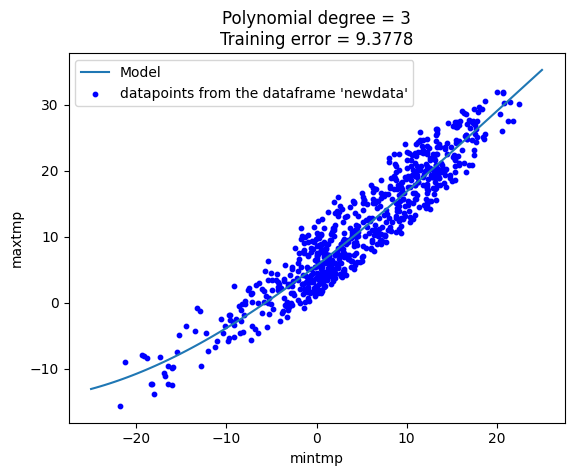

Polynomial degree =  5
The first two rows of X_poly: 
 [[   1.        -2.6        6.76     -17.576     45.6976  -118.81376]
 [   1.         1.8        3.24       5.832     10.4976    18.89568]]

The learned weights: 
 [ 5.54138025e+00  1.00038517e+00  1.50842415e-02  1.43485632e-04
 -2.02506416e-05 -3.35108778e-07]


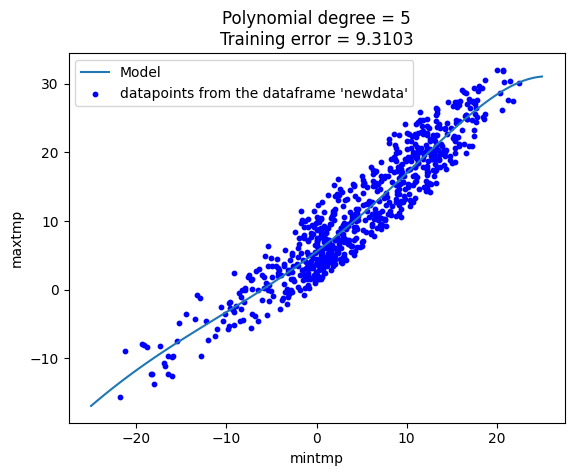

Polynomial degree =  10
The first two rows of X_poly: 
 [[ 1.00000000e+00 -2.60000000e+00  6.76000000e+00 -1.75760000e+01
   4.56976000e+01 -1.18813760e+02  3.08915776e+02 -8.03181018e+02
   2.08827065e+03 -5.42950368e+03  1.41167096e+04]
 [ 1.00000000e+00  1.80000000e+00  3.24000000e+00  5.83200000e+00
   1.04976000e+01  1.88956800e+01  3.40122240e+01  6.12220032e+01
   1.10199606e+02  1.98359290e+02  3.57046723e+02]]

The learned weights: 
 [ 5.39535230e+00  9.57840945e-01  2.88770485e-02  6.65906825e-04
 -9.70948971e-05 -1.08642443e-06 -4.28115280e-07 -2.93919840e-09
  2.82296800e-09  5.31380148e-12 -3.58824082e-12]


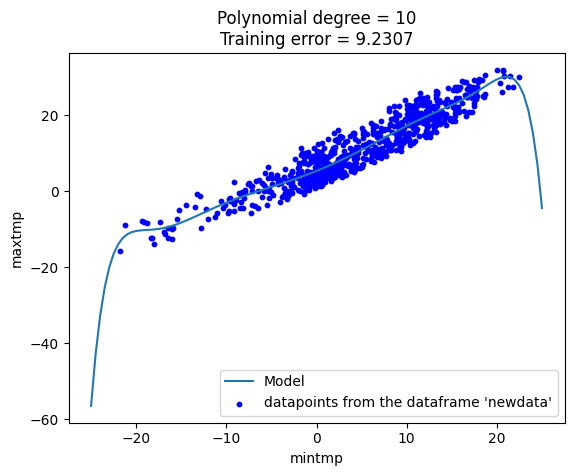

In [60]:
degrees = [3, 5,10]

# store the resulting training errors for each polynomial degree
tr_errors = []
print(X.shape)
for i in range(len(degrees)):

    print("Polynomial degree = ",degrees[i])

    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(X)

    lin_regr = LinearRegression(fit_intercept=False)
    lin_regr.fit(X_poly,y)

    y_pred = lin_regr.predict(X_poly)
    tr_error = mean_squared_error(y, y_pred)

    print("The first two rows of X_poly: \n",X_poly[0:2])

    print("\nThe learned weights: \n",lin_regr.coef_)

    tr_errors.append(tr_error)
    X_fit = np.linspace(-25, 25, 100)
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")
    plt.scatter(X, y, color="b", s=10, label="datapoints from the dataframe 'newdata'")
    plt.xlabel('mintmp')
    plt.ylabel('maxtmp')
    plt.legend(loc="best")
    plt.title('Polynomial degree = {}\nTraining error = {:.5}'.format(degrees[i], tr_error))
    plt.show()


Number of datapoints in this subset:  71


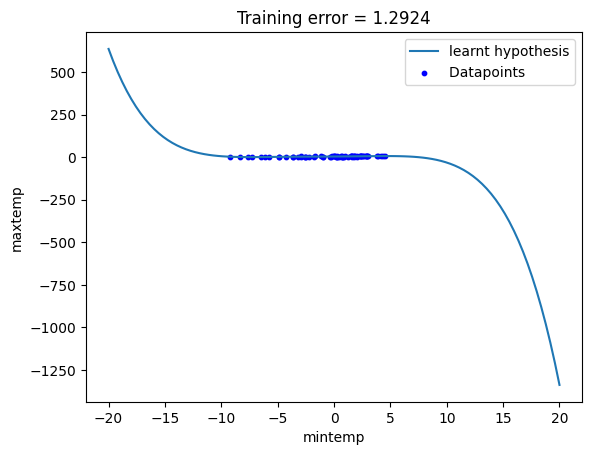


Number of datapoints in this subset:  285


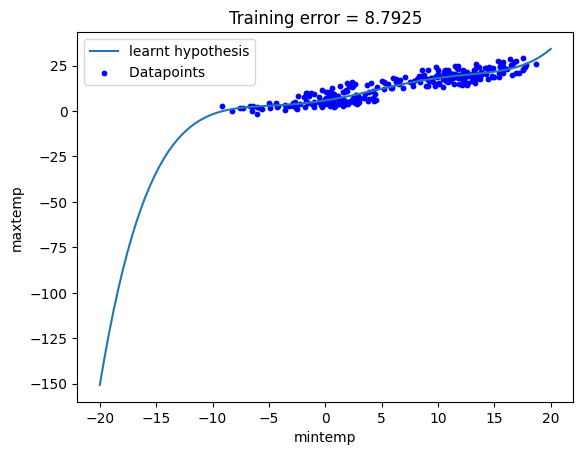


Number of datapoints in this subset:  427


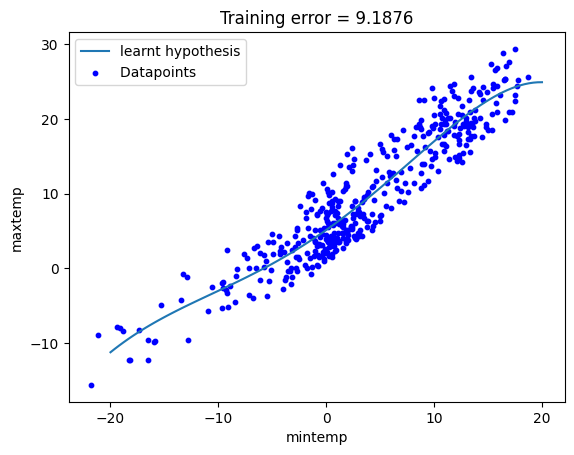

In [61]:
# set the different sizes of training set
trainingset_size = [0.1, 0.4, 0.6]
degree = 5
tr_errors = []

for i in range(len(trainingset_size)):
    index = np.arange(int(len(X)*trainingset_size[i]))
    print("\nNumber of datapoints in this subset: ",len(index))

    X_sub = X[index]
    y_sub = y[index]


    poly = PolynomialFeatures(degree=degree)

    X_poly = poly.fit_transform(X_sub)

    lin_regr = LinearRegression(fit_intercept=False)  # "fit_intercept=False" as we already have a constant term in the new feature X_poly

    lin_regr.fit(X_poly, y_sub)


    y_pred = lin_regr.predict(X_poly)

    tr_error = mean_squared_error(y_sub, y_pred)

    tr_errors.append(tr_error)
    X_fit = np.linspace(-20, 20, 100)
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="learnt hypothesis")
    plt.scatter(X_sub, y_sub, color="b", s=10, label="Datapoints ")
    plt.xlabel('mintemp')
    plt.ylabel('maxtemp')
    plt.legend(loc="best")
    plt.title('Training error = {:.5}'.format(tr_error))
    plt.show()